**Assignment 2: Processing Datasets in Python**  
Team:  
*   Nelly Fernanda torres Ramírez 2014788
*   Leyanet Piedra Llanes 2011260
*   Ana Sofía Vara Buentello 2109189
*   Guillermo Gil Flores 1963954
*   Mauricio Alejandro Olivares Mata 1973006

Teacher: Daniel Isaías López Páez  
Class: Artificial Intelligence   
Class schedule: N4, 3







**Part 1: Data Loading and Exploration**  


---



In [ ]:
#Import libraries to be used in the code
import pandas as pd  #data structures
import numpy as np   #advanced mathematics
from sklearn.preprocessing import MinMaxScaler  #normalize values
import gdown #download files from Google Drive using its file ID

#Load dataset
file_id = "1eemNOsU6ywB7AqSQR896D3_Sz1Ff2ayKqiPjoNfEmZM"  #obtained from the URL of the shared file
url = f"https://drive.google.com/uc?id={file_id}" #download URL is created
df = gdown.download(url, "dataset_diabetes.ext", quiet=False) #downloads the file and names it
df = pd.read_excel(df) #saves the file in a DataFrame to structure the data in a two-dimensional, labeled, tabular form
dfRaw = df.copy() #stores pure values in a separate table for analysis in part 3

#Show the first rows
def display_head():      #function that returns the first 5 rows of the DataFrame
    print("Primeras filas del dataset:")
    display(df.head())

#Identify zeros
def check_missing_values():
    zero_columns = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']  #columns where we want to count zero values
    for col in zero_columns:
        zero_count = (df[col] == 0).sum()  #counts the number of 0's in the current column
        print(f"Ceros encontrados en {col}: {zero_count}.")

#Generate descriptive statistics
def display_stats():
    print("Estadísticas descriptivas del dataset:")
    display(df.describe())

# Perform main functions
print("\n") #leaves a blank line between results (visual change)
display_head()
check_missing_values()
print("\n")
display_stats()
print("\n")
print("Part 1 completed")

Downloading...
From (original): https://drive.google.com/uc?id=1eemNOsU6ywB7AqSQR896D3_Sz1Ff2ayKqiPjoNfEmZM
From (redirected): https://docs.google.com/spreadsheets/d/1eemNOsU6ywB7AqSQR896D3_Sz1Ff2ayKqiPjoNfEmZM/export?format=xlsx
To: /content/dataset_diabetes.ext
37.3kB [00:00, 33.6MB/s]




Primeras filas del dataset:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Ceros encontrados en Glucose: 5.
Ceros encontrados en BloodPressure: 35.
Ceros encontrados en SkinThickness: 227.
Ceros encontrados en Insulin: 374.
Ceros encontrados en BMI: 11.


Estadísticas descriptivas del dataset:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000




Part 1 completed


**Part 2: Data Cleanning and Normalization**

In [ ]:
def replace_for_median(): # Replace zero values by the median in the specific columns
    zero_columns = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
    for col in zero_columns:
        median_value = df[col].median()  # Obtain the median of the columns
        df[col] = df[col].replace(0, median_value)  # Replace zero's
    print("Zero values replaced by the median.")

replace_for_median()

def normalize_data(): # Normalization of data
    scaler = MinMaxScaler()
    numerical_columns = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
    df[numerical_columns] = scaler.fit_transform(df[numerical_columns])  # Apply normalization
    print("Normalized data using Min-Max Scaling.")

normalize_data()

print("First rows after cleaning and normalization:") # Show only the first data
display(df.head())

print("Part 2 completed.")

Zero values replaced by the median.
Normalized data using Min-Max Scaling.
First rows after cleaning and normalization:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,0.670968,0.489796,0.304348,0.019832,0.314928,0.627,50,1
1,1,0.264516,0.428571,0.239130,0.019832,0.171779,0.351,31,0
2,8,0.896774,0.408163,0.173913,0.019832,0.104294,0.672,32,1
3,1,0.290323,0.428571,0.173913,0.096154,0.202454,0.167,21,0
4,0,0.600000,0.163265,0.304348,0.185096,0.509202,2.288,33,1


Part 2 completed.


**Part 3: Data Visualization**

Histograms of glucose levels


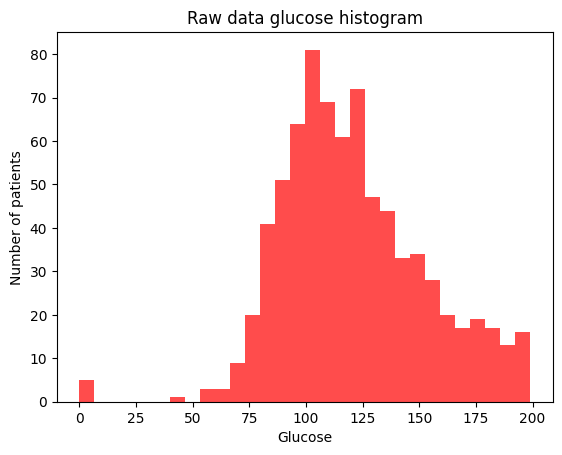

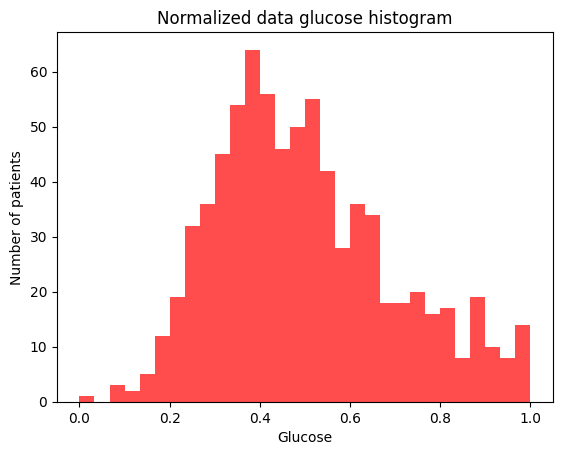

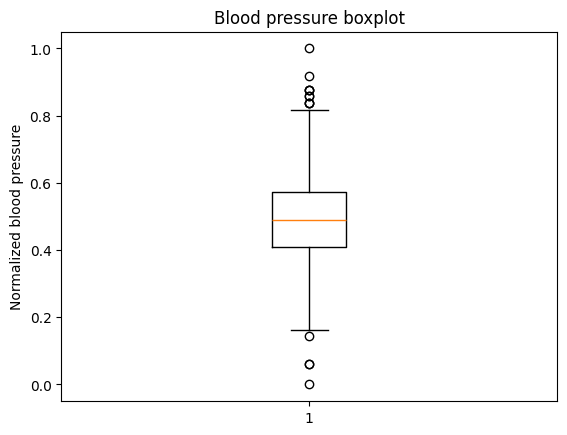

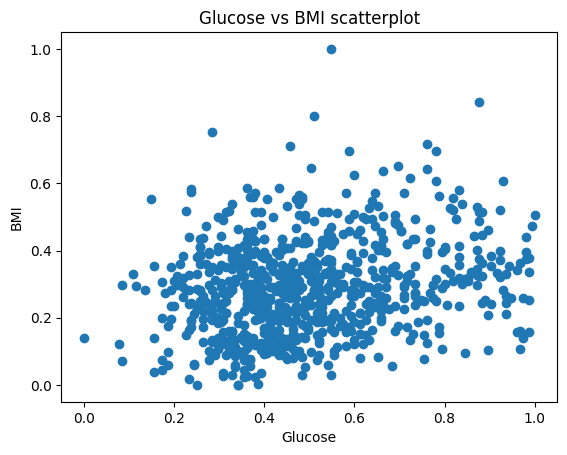




Part 3 completed.


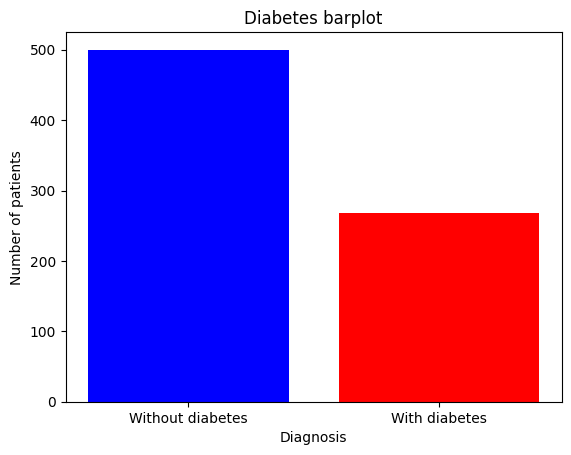

In [ ]:
import matplotlib.pyplot as plt

def histogram(data, title, xlabel, ylabel): #Creates a histogram based on the data
  plt.hist(data, bins = 30, alpha = 0.7, color = "red")
  plt.title(title)
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.show()

def boxplot(data, title, ylabel): #Creates a boxplot based on the data
  plt.boxplot(data)
  plt.title(title)
  plt.ylabel(ylabel)
  plt.show()

def scatterplot(datax, datay, title, xlabel, ylabel): #Creates a scatterplot based on the data
  plt.scatter(datax, datay)
  plt.title(title)
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.show()

def barplot(values, title, xlabel, ylabel): #Creates a barplot based on the data
  categories = ["Without diabetes", "With diabetes"]
  plt.bar(categories, values, color = ["blue", "red"])
  plt.title(title)
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)

print("Histograms of glucose levels")
histogram(dfRaw["Glucose"], "Raw data glucose histogram", "Glucose", "Number of patients") #Histogram of glucose raw data
print("\n")
histogram(df["Glucose"], "Normalized data glucose histogram", "Glucose", "Number of patients") #Histogram of normalized glucose data
print("\n")

boxplot(df["BloodPressure"], "Blood pressure boxplot", "Normalized blood pressure") #Boxplot of blood pressure
print("\n")

scatterplot(df["Glucose"], df["BMI"], "Glucose vs BMI scatterplot", "Glucose", "BMI") #Scatterplot of Glucose vs BMI
print("\n")

barplot(df["Outcome"].value_counts().sort_index().values, "Diabetes barplot", "Diagnosis", "Number of patients") #Barplot of diabetes diagnosis

print("\nPart 3 completed.")


**Part 4: Answer the following questions**

1. What impact do missing values have on data analysis? <br>
Missing values in the databases can cause the analysis to be biased and not fully represent reality by reducing the amount of data available. Thus, when performing statistics such as the media, the results will be distorted.
<br>
2. How can we detect and handle outliers in biomedical datasets? <br>
Outliers can be detected using statistical methods like the standard deviation, or visualization techniques such as histograms and boxplots.  <br>
3. What are some common causes of missing or incorrect data in biomedical studies?<br> The human error in data entry, the error in data collection or issues withe sensor or measurements instruments.
<br>
4. How does normalizing data improve the performance of Machine Learning models? <br> Helps machine learning models converge faster and improves training stability, also it prevents features with large values from dominating smaller ones, leading to a more balanced learning process. <br>

5. Why is visualizing data an important step before applying Machine Learning models?<br> Helps to identify patterns, outliers and abnormal distributions. <br>

6. Why is preprocessing critical when working with medical datasets?<br> The medical data often contains missing values or errors that can affect the model accuracy, so preprocessing ensures that the data is reliable and representative of real cases.<br>

7. What ethical concerns should be considered when handling patient data?<br>The patient privacy and confidentiality, or the proper and transparent used of data. <br>